# Simple Neural Network

Introduction

This notebook demonstrates the implementation of a simple neural network on the MNIST dataset, focusing on visualizing the training process, specifically how the weights are updated during training. It utilizes TensorFlow for building the model and Matplotlib for plotting the weight changes.

Following are the content of the notebook
1. Importing Libraries: Essential libraries like TensorFlow and Matplotlib are imported.
2. Dataset Loading and Preprocessing: The MNIST dataset is loaded, normalized, and labels are one-hot encoded.
3. Model Definition: A simple neural network is defined using TensorFlow/Keras, focusing on visualizing weight updates.
4. Model Compilation: The model is compiled with a loss function, optimizer, and evaluation metrics.
5. Training the Model: The network is trained, with weight updates being tracked.
6. Visualization of Weight Updates: Matplotlib is used to visualize how weights change during the training process.

Here are the variables present in this Jupyter Notebook:

- `acc`: A list containing the training accuracy values for each epoch. Length: 25
- `epochs`: A range object representing the number of epochs. Value: range(1, 26)
- `history`: A `keras.callbacks.History` object that tracks the training history.
- `loss`: A list containing the training loss values for each epoch. Length: 25
- `model`: A `keras.engine.sequential.Sequential` object representing the neural network model.
- `test_accuracy`: A float representing the accuracy of the model on the test dataset. Value: 0.9235000014305115
- `test_loss`: A float representing the loss of the model on the test dataset. Value: 0.2707545757293701
- `val_acc`: A list containing the validation accuracy values for each epoch. Length: 25
- `val_loss`: A list containing the validation loss values for each epoch. Length: 25
- `x_test`: A numpy array representing the test input data.
- `x_train`: A numpy array representing the training input data.
- `y_test`: A numpy array representing the test labels.
- `y_train`: A numpy array representing the training labels.


## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


## Importing Dataset & Prepocessing

### Loading The Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Dataset Preprocessing

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Defining a Simple Neural Network

### Model definition

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D vectors
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])

### Visualisation Model Architecture

In [22]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_dtype=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Training a Simple Neural Network

### Defining Training Hyperparameters

In [23]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model Fitting

In [24]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4832 - accuracy: 0.8723 - val_loss: 0.3386 - val_accuracy: 0.9076
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.9051 - val_loss: 0.3063 - val_accuracy: 0.9167
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.9116 - val_loss: 0.2989 - val_accuracy: 0.9176
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3028 - accuracy: 0.9155 - val_loss: 0.2907 - val_accuracy: 0.9176
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.9169 - val_loss: 0.2844 - val_accuracy: 0.9204
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2894 - accuracy: 0.9194 - val_loss: 0.2811 - val_accuracy: 0.9203
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2849 - accuracy: 0.9204 - val_loss: 0.2813 - val_accuracy:

In [26]:
tf.keras.models.save_model(model, 'simple_neural_network_model.h5')

### Training History Plot

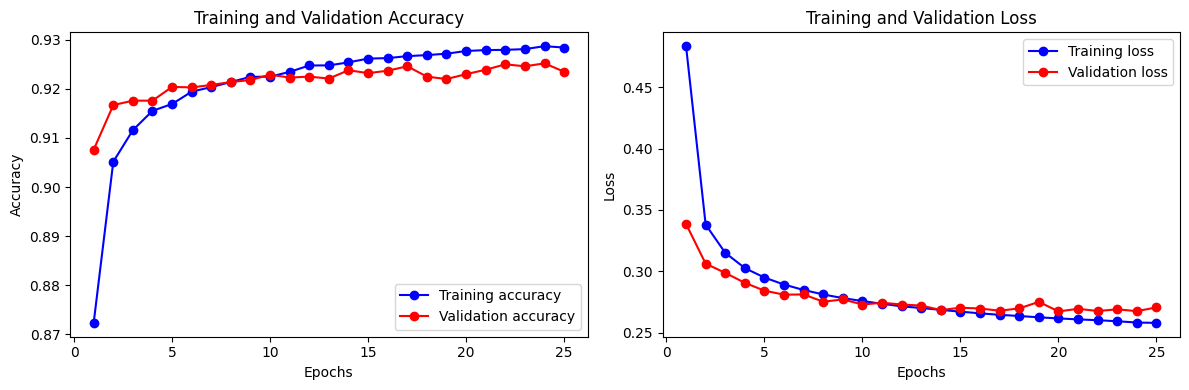

In [25]:
# Extracting the values for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Range for the x-axis (epochs)
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Testing a Simple Neural Network

### Loading The Trainied Model

In [27]:
model = tf.keras.models.load_model('simple_neural_network_model.h5')


### Plotting Test Results

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 3ms/step - loss: 0.2708 - accuracy: 0.9235
Test Loss: 0.2707545757293701
Test Accuracy: 0.9235000014305115
